In [31]:
import cv2

In [32]:
img = cv2.imread('lena10.jpg')

In [33]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img.shape


(512, 512, 3)

In [34]:
x, y,z = img.shape

In [35]:
import matplotlib.pyplot as plt

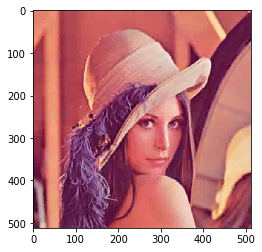

In [36]:
plt.imshow(img)

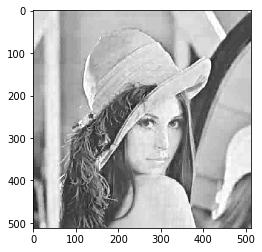

In [37]:
plt.imshow(img[:,:,0],cmap='gray')
plt.savefig('lena_red.jpg')

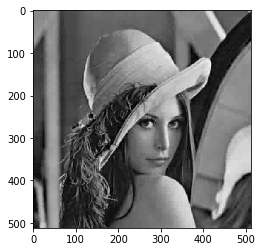

In [38]:
plt.imshow(img[:,:,1],cmap='gray')
plt.savefig('lena_blue.jpg')

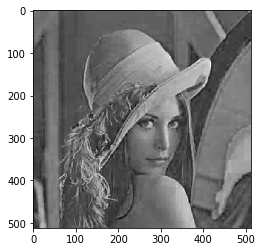

In [39]:
plt.imshow(img[:,:,2],cmap='gray')
plt.savefig('lena_green.jpg')

In [40]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hash = img.copy()
Y,X,Z = img.shape

In [41]:
key ='110100100111010111110101110100100111010111110101'

In [42]:
len(key)

48

In [43]:
map='11001100'

In [44]:
binary = ''
new_binary =''
index =1
for y in range(Y):
    for x in range(X):
        index =1
        binary = ''
        new_binary =''
        extra=''
        if len(bin(img[y,x,0])[2:])<8:
            
            for e in range(8-len(bin(img[y,x,0])[2:])):
                extra= extra +'0'
        binary = binary+map+ extra + (bin(img[y,x,0])[2:])
        extra=''
        if len(bin(img[y,x,1])[2:])<8:
            
            for e in range(8-len(bin(img[y,x,1])[2:])):
                extra= extra +'0'
        binary = binary+map+extra + (bin(img[y,x,1])[2:])
        extra=''
        if len(bin(img[y,x,2])[2:])<8:
            
            for e in range(8-len(bin(img[y,x,2])[2:])):
                extra= extra +'0'
        binary = binary+map+extra + (bin(img[y,x,2])[2:])
        for i in range(len(key)):
            if int(binary[i])==int(key[i]):
                new_binary = new_binary +'0'
            else:
                new_binary = new_binary +'1'
        img_hash[y,x,0]=int(new_binary[0:16],2)
        img_hash[y,x,1]=int(new_binary[16:32],2)
        img_hash[y,x,2]=int(new_binary[32:48],2)
       

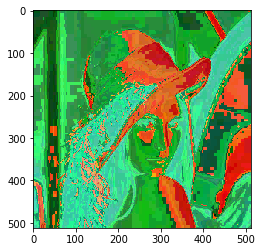

In [107]:
plt.imshow(img_hash)
plt.savefig('hash_img.jpg')

In [73]:
import numpy as np
t = np.linspace(0,2.5,50)

In [47]:
from matplotlib.pyplot import figure

In [48]:
key2 ='111010001100101011011010111010001100101011011010'

In [49]:
print(img_hash[99,1,1]) 

234


In [50]:
img_recover = img.copy()

In [51]:
binary = ''
new_binary =''
index =1
for y in range(Y):
    for x in range(X):
        index =1
        binary = ''
        new_binary =''
        extra=''
        if len(bin(img_hash[y,x,0])[2:])<8:
            
            for e in range(8-len(bin(img_hash[y,x,0])[2:])):
                extra= extra +'0'
        binary = binary+map+extra + (bin(img_hash[y,x,0])[2:])
        extra=''
        if len(bin(img_hash[y,x,1])[2:])<8:
            
            for e in range(8-len(bin(img_hash[y,x,1])[2:])):
                extra= extra +'0'
        binary = binary+map+extra + (bin(img_hash[y,x,1])[2:])
        extra=''
        if len(bin(img_hash[y,x,2])[2:])<8:
            
            for e in range(8-len(bin(img_hash[y,x,2])[2:])):
                extra= extra +'0'
        binary = binary+map+extra + (bin(img_hash[y,x,2])[2:])
        for i in range(len(key)):
            if int(binary[i])==int(key[i]):
                new_binary = new_binary +'0'
            else:
                new_binary = new_binary +'1'
        img_recover[y,x,0]=int(new_binary[0:16],2)
        img_recover[y,x,1]=int(new_binary[16:32],2)
        img_recover[y,x,2]=int(new_binary[32:48],2)

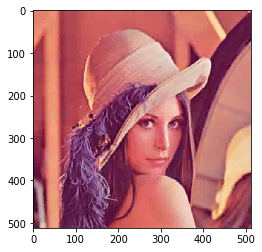

In [106]:
img_recover = cv2.cvtColor(img_recover,cv2.COLOR_BGR2RGB)
plt.imshow(img_recover)
plt.savefig('recover_img.jpg')

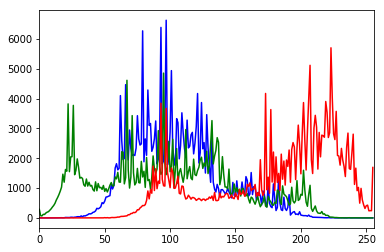

In [105]:
# histogram of red channel of Original Channel
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.savefig('hist_img.jpg')
plt.show()


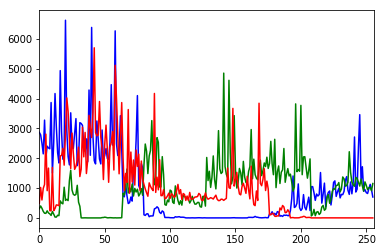

In [54]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_hash],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.savefig('hist_hash.jpg')
plt.show()


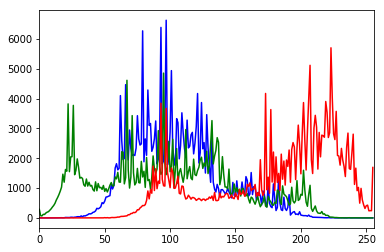

In [89]:
img_recover = cv2.cvtColor(img_recover,cv2.COLOR_BGR2RGB)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_recover],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.savefig('hist_rec.jpg')
plt.show()

In [90]:
from scipy import signal


In [91]:
co = signal.correlate2d(img[0:50,0:50,0],img_hash[0:50,0:50,0])

In [92]:
from sklearn.metrics import mean_squared_error 

In [93]:
MSE_red = mean_squared_error(img[:,:,0],img_hash[:,:,0]) 

In [94]:
print(MSE_red)

145.0068359375


In [95]:
MSE_r_red = mean_squared_error(img[:,:,0],img_recover[:,:,0]) 

In [96]:
print(MSE_r_red)

0.0


In [97]:
MSE_blue = mean_squared_error(img[:,:,1],img_hash[:,:,1]) 

In [98]:
print(MSE_blue)

129.9697265625


In [99]:
MSE_r_blue = mean_squared_error(img[:,:,1],img_recover[:,:,1]) 

In [100]:
print(MSE_r_blue)

0.0


In [101]:
MSE_green = mean_squared_error(img[:,:,2],img_hash[:,:,2]) 

In [102]:
print(MSE_green)

144.2174072265625


In [103]:
MSE_r_green = mean_squared_error(img[:,:,2],img_recover[:,:,2])

In [104]:
print(MSE_r_green)

0.0
